In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder 


%matplotlib inline

In [2]:
df = pd.read_csv("data/Train.csv")

In [3]:
df.head()

,field_id,B02_04,B02_05,B02_06,B02_07,B02_08,B02_09,B02_10,B02_11,B03_04,...,WET_11,PVR_04,PVR_05,PVR_06,PVR_07,PVR_08,PVR_09,PVR_10,PVR_11,label
0,1,16.721329,24.704984,143.294212,120.819938,44.800108,16.204582,84.610932,71.071544,24.630225,...,1.962072,-0.129347,-0.118203,-0.027443,0.040792,0.171888,0.038998,-0.064742,-0.069020,4
1,2,32.724639,55.923914,125.333332,69.246375,40.289855,40.369565,56.710145,121.275364,42.333333,...,7.068886,-0.146733,-0.087567,-0.032327,0.022328,0.115969,-0.060363,-0.128947,-0.093419,7
2,4,32.280353,34.968543,154.134656,98.110374,37.219647,16.107616,37.224062,49.027595,43.079471,...,-27.280756,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-0.027601,-0.118679,8
3,6,18.155303,31.757102,145.524621,108.803978,60.709280,33.967330,53.688447,106.650568,28.818182,...,11.352537,-0.118640,-0.073378,-0.001560,0.080290,0.042376,0.018127,0.021250,0.000732,4
4,8,24.826734,79.171811,105.283333,74.694014,68.673711,13.678272,50.742448,111.811466,39.079529,...,5.653202,-0.209057,-0.126597,-0.055015,-0.009886,0.056202,-0.122661,-0.154477,-0.103681,8


In [4]:
df.shape

(152379, 74)

In [ ]:
df.info

In [6]:
df.isnull().sum()

field_id    0
B02_04      0
B02_05      0
B02_06      0
B02_07      0
           ..
PVR_08      0
PVR_09      0
PVR_10      0
PVR_11      0
label       0
Length: 74, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

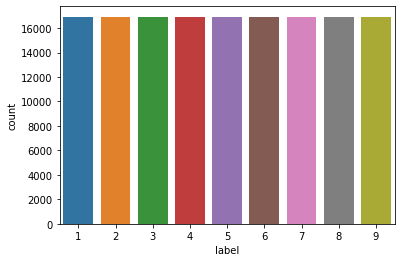

In [7]:
sns.countplot(x="label", data=df)

In [8]:
df.columns

Index(['field_id', 'B02_04', 'B02_05', 'B02_06', 'B02_07', 'B02_08', 'B02_09',
       'B02_10', 'B02_11', 'B03_04', 'B03_05', 'B03_06', 'B03_07', 'B03_08',
       'B03_09', 'B03_10', 'B03_11', 'B04_04', 'B04_05', 'B04_06', 'B04_07',
       'B04_08', 'B04_09', 'B04_10', 'B04_11', 'B08_04', 'B08_05', 'B08_06',
       'B08_07', 'B08_08', 'B08_09', 'B08_10', 'B08_11', 'B11_04', 'B11_05',
       'B11_06', 'B11_07', 'B11_08', 'B11_09', 'B11_10', 'B11_11', 'B12_04',
       'B12_05', 'B12_06', 'B12_07', 'B12_08', 'B12_09', 'B12_10', 'B12_11',
       'NDVI_04', 'NDVI_05', 'NDVI_06', 'NDVI_07', 'NDVI_08', 'NDVI_09',
       'NDVI_10', 'NDVI_11', 'WET_04', 'WET_05', 'WET_06', 'WET_07', 'WET_08',
       'WET_09', 'WET_10', 'WET_11', 'PVR_04', 'PVR_05', 'PVR_06', 'PVR_07',
       'PVR_08', 'PVR_09', 'PVR_10', 'PVR_11', 'label'],
      dtype='object')

In [9]:
df.drop('field_id', axis = 1, inplace=True)

In [10]:
#df=df[df.CLM != 255.0]

In [11]:
#df.date.max()

In [12]:
#df.date.min()

In [13]:
#df.field_id.unique()

In [14]:
#df['date'] = pd.to_datetime(df["date"])
#df['month'] = df['date'].dt.month

In [15]:
#vdf.CLM.value_counts()

In [16]:
# X = df[['B02', 'B03', 'B04', 'B08', 'B11', 'B12', 'PVR', 'NDVI', 'WET', 'days_from_april']]
# y = df.label

In [17]:
X = df.drop("label", axis=1)
y = df.label

In [18]:
X

,B02_04,B02_05,B02_06,B02_07,B02_08,B02_09,B02_10,B02_11,B03_04,B03_05,...,WET_10,WET_11,PVR_04,PVR_05,PVR_06,PVR_07,PVR_08,PVR_09,PVR_10,PVR_11
0,16.721329,24.704984,143.294212,120.819938,44.800108,16.204582,84.610932,71.071544,24.630225,32.865755,...,1.518052,1.962072,-0.129347,-0.118203,-0.027443,0.040792,0.171888,0.038998,-0.064742,-0.069020
1,32.724639,55.923914,125.333332,69.246375,40.289855,40.369565,56.710145,121.275364,42.333333,58.434782,...,-30.653607,7.068886,-0.146733,-0.087567,-0.032327,0.022328,0.115969,-0.060363,-0.128947,-0.093419
2,32.280353,34.968543,154.134656,98.110374,37.219647,16.107616,37.224062,49.027595,43.079471,44.198675,...,-15.935883,-27.280756,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-0.027601,-0.118679
3,18.155303,31.757102,145.524621,108.803978,60.709280,33.967330,53.688447,106.650568,28.818182,40.115057,...,2.198698,11.352537,-0.118640,-0.073378,-0.001560,0.080290,0.042376,0.018127,0.021250,0.000732
4,24.826734,79.171811,105.283333,74.694014,68.673711,13.678272,50.742448,111.811466,39.079529,83.152099,...,-31.349842,5.653202,-0.209057,-0.126597,-0.055015,-0.009886,0.056202,-0.122661,-0.154477,-0.103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152374,20.403039,59.414845,80.847889,27.824667,59.708337,81.547986,46.761128,67.944430,33.696896,68.325615,...,-49.609795,-41.660880,-0.183287,-0.130227,-0.083794,-0.111953,-0.087094,-0.080153,-0.126261,-0.119986
152375,43.263652,64.798399,70.318978,31.452927,53.690466,67.588925,76.104462,72.158007,57.171448,76.310746,...,-39.567011,-43.322944,-0.194625,-0.165170,-0.121343,-0.184359,-0.155505,-0.130677,-0.168950,-0.146476
152376,24.294387,80.966079,97.427150,82.883655,68.383974,62.480107,85.343281,75.238125,40.287612,88.194767,...,-28.060320,-37.588233,-0.209406,-0.139067,-0.101158,-0.086092,-0.092242,-0.099815,-0.094287,-0.123467
152377,23.256538,46.628218,94.869888,35.849067,70.241120,41.519023,44.394830,68.003466,39.282254,54.634426,...,-54.715415,-49.131428,-0.155267,-0.089067,-0.099821,-0.116138,-0.090815,-0.125115,-0.128937,-0.115460


In [19]:
y.unique()

array([4, 7, 8, 2, 3, 6, 1, 5, 9])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150, shuffle=True)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
inp = tf.keras.Input(shape=72,)
x = tf.keras.layers.Dense(100, activation = 'relu')(inp)
out = tf.keras.layers.Dense(50, activation = 'softmax')(x)

model = tf.keras.Model(inp, out)
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

batch_size = 100
epochs = 100

history = model.fit(X_train, y_train, validation_split = 0.2, batch_size = batch_size, epochs = epochs)

2022-07-01 15:32:39.498790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-01 15:32:39.499366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/100


2022-07-01 15:32:39.731771: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-01 15:32:39.923902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


848/854 [============================>.] - ETA: 0s - loss: 3.5166 - accuracy: 0.3798

2022-07-01 15:32:44.128348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


854/854 [==============================] - 5s 6ms/step - loss: 3.5043 - accuracy: 0.3803 - val_loss: 1.5306 - val_accuracy: 0.4691
Epoch 2/100
854/854 [==============================] - 6s 7ms/step - loss: 1.5802 - accuracy: 0.4650 - val_loss: 1.5173 - val_accuracy: 0.4772
Epoch 3/100
854/854 [==============================] - 6s 7ms/step - loss: 1.4811 - accuracy: 0.4871 - val_loss: 1.4907 - val_accuracy: 0.4672
Epoch 4/100
854/854 [==============================] - 5s 5ms/step - loss: 1.4271 - accuracy: 0.5003 - val_loss: 1.4308 - val_accuracy: 0.4843
Epoch 5/100
854/854 [==============================] - 6s 7ms/step - loss: 1.3986 - accuracy: 0.5087 - val_loss: 1.3074 - val_accuracy: 0.5423
Epoch 6/100
854/854 [==============================] - 5s 5ms/step - loss: 1.3440 - accuracy: 0.5235 - val_loss: 1.3954 - val_accuracy: 0.5222
Epoch 7/100
854/854 [==============================] - 6s 7ms/step - loss: 1.3393 - accuracy: 0.5266 - val_loss: 1.3314 - val_accuracy: 0.5383
Epoch 8/100

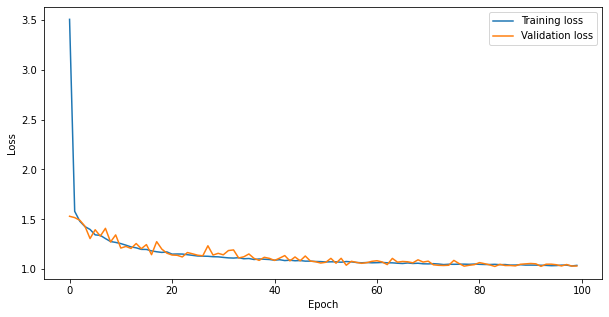

In [23]:
plt.figure(figsize = (10, 5))

plt.plot(range(epochs), history.history['loss'], label = 'Training loss')
plt.plot(range(epochs), history.history['val_loss'], label = 'Validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.0252964496612549
Test accuracy: 0.630988359451294


In [32]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

2022-07-01 15:57:03.734872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


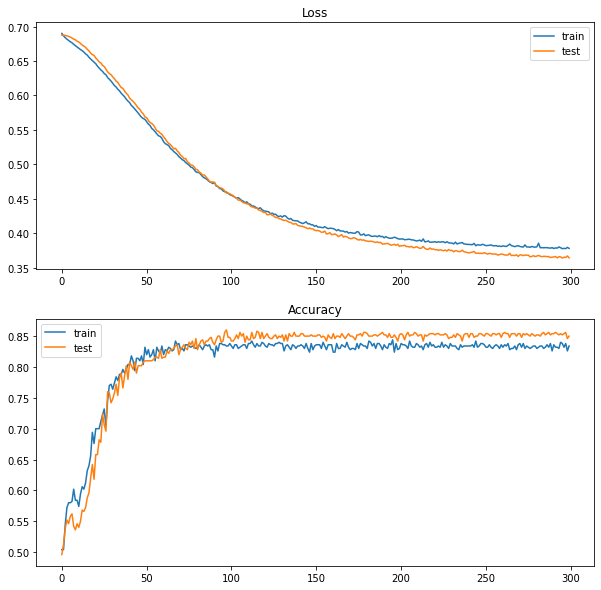

In [48]:
plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Stuff from Neue Fische Notebook ... Normalization, Regularization, Dropout, Model tuning, Visualization

In [25]:
# Convert to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [26]:

# Define dictionary to store results
training_history = {}

# Define number of epochs and learning rate decay
N_TRAIN = len(X_train)
EPOCHS = 2000
BATCH_SIZE = 32
STEPS_PER_EPOCH = N_TRAIN // BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.01,
    decay_steps=STEPS_PER_EPOCH*1000,
    decay_rate=1,
    staircase=False)


# Define optimizer used for modelling
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, name='Adam')

In [27]:
# Plotting function for MSE
def plot_metric(history):
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [28]:
# Plotting function for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [29]:
# Function for large model architecture 
def get_compiled_large_model():
    large_model = tf.keras.Sequential([
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu', input_dim = 12),
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu'),
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu'),
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu'),
      tf.keras.layers.Dense(1,kernel_initializer = 'uniform')
    ])

    large_model.compile(optimizer=optimizer,
                  loss='mae',
                  metrics=['mse'])
    return large_model

In [30]:
# Summary of large sized model
with tf.device('/cpu:0'):
    large_model = get_compiled_large_model()
    print(large_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               6656      
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 795,137
Trainable params: 795,137
Non-trainable params: 0
_________________________________________________________________
None


### Regularization

In [52]:
# Large model with additional L2 regularization
def get_compiled_l2_model():
    l2_model = tf.keras.Sequential([
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu', kernel_regularizer=regularizers.l2(0.01),
                            input_dim = 12),
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      tf.keras.layers.Dense(1,kernel_initializer = 'uniform')
    ])

    l2_model.compile(optimizer=optimizer,
                  loss='mae',
                  metrics=['mse'])
    return l2_model

### Dropout

### Regularization + Dropout

### Model tuning

### Visualization